# Cardio Good Fitness Project
By:  Glen A Patterson

Date:  8-6-2022

## Problem Statement:
Explore the dataset to identify differences between the customers and the products, relationship between different attributes of the customers, and find any other beneficial information Cardio Good Fitness would be interested in.

## Key Questions:
1.   Come up with a customer profile (characteristics of a customer) of the different products.
2.   Perform univariate and multivariate analyses
3.   Generate a set of insights and recommendations that will help the company in targeting new customers.

## Data Dictionary:
1.   Product - The model number of the treadmill
2.   Age - Age of the customer in number of years
3.   Gender - Gender of the customer
4.   Education - Education of the customer in number of years
5.   Marital Status - Marital status of the customer
6.   Usage - Average number of times customer wants to use the treadmill every week
7.   Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8.   Income - Income of the customer
9.   Miles - Miles that a customer expects to run

## Importing the necessary libraries:

In [4]:
# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset:

In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the csv file and call the dataframe "data"
data = pd.read_csv('/content/drive/MyDrive/AIML/Week 4 (Project_01)/CardioGoodFitness.csv')

In [7]:
# Make a copy of original dataframe "data" and call it "df".  We will be modifying this dataframe
df = data.copy()

## Data Overview

In [8]:
# Observing the first 5 rows of the dataset to make sure it loaded correctly
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


*   Looks like the dataset loaded with correct columns heading and everything looks fine.

In [9]:
# Get information about number of rows and columns in the dataset (rows, columns)
df.shape

(180, 9)

*   We can see that there is 180 rows and 9 columns

In [10]:
# Information on dataset(data types, format, missing data, ect.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


*   This is a clean dataset with **NO** missing data "NaN" values.
*   We have six "int64" and three "object" data type values in each row.
*   Data looks to be in the preferred format.

In [11]:
# Check the statistical summary of the data at a glance
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0




*   The data set looks to have data within reason, even outliers.

In [12]:
# Find the type and number of treadmill products that Cardio Good Fitness sells
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [13]:
# Find the number of customers based on gender for Cardio Good Fitness
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [14]:
# Find the number of customers based on marital status for Cardio Good Fitness
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [34]:
#Find the Marital Status statistics on both Males and Females for Cardio Good Fitness
df.groupby('Gender')['MaritalStatus'].value_counts(normalize=True)

Gender  MaritalStatus
Female  Partnered        0.605263
        Single           0.394737
Male    Partnered        0.586538
        Single           0.413462
Name: MaritalStatus, dtype: float64

- 60.5% of the Cardio Good Fitness Female customers are partnered
- 39.5% of the Cardio Good Fitness Female customers are single
- 58.7% of the Cardio Good Fitness Male customers are partnered
- 41.3% of the Cardio Good Fitness Male customers are single

In [16]:
#Find the type and number of treadmill products sold based on Gender and Marital Status
df.groupby(['Gender','MaritalStatus'])['Product'].value_counts()

Gender  MaritalStatus  Product
Female  Partnered      TM195      27
                       TM498      15
                       TM798       4
        Single         TM498      14
                       TM195      13
                       TM798       3
Male    Partnered      TM195      21
                       TM498      21
                       TM798      19
        Single         TM195      19
                       TM798      14
                       TM498      10
Name: Product, dtype: int64

- Cardio Good Fitness sells three Treadmills:
  1.   TM195 (top seller with 80 units sold)
  2.   TM498 (60 units sold)
  3.   TM798 (40 units sold)
- Most of their customers are Male
- The majority of their customers are Partnered (Both Males and Females)
- TM498 is the most popular item for Single Females
- TM195 is the most popular item for Partnered Females
- TM195 is the most popular item for Single Males
- TM195 and TM498 are equal popular items for Partnered Males
- There is little differance in popularity for all three treadmills sold for Partnered Males
- There is little differance in popularity for TM195 and TM498 treadmills sold for Single Females

## Exploratory Data Analysis
1.   Univariate Data Analysis
2.   Multivariate Data Analysis
3.   Bivariate Data Analysis

### Univariate Analysis


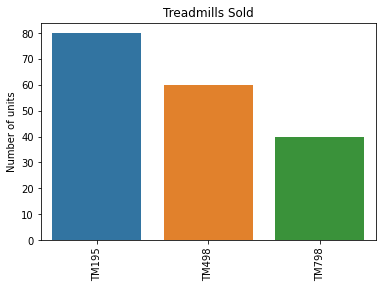

In [17]:
#plot the Type of Treadmills sold
plt.title('Treadmills Sold')
sns.countplot(data=df, x='Product')
plt.xlabel('')
plt.ylabel('Number of units')
plt.xticks(rotation=90)
plt.show()

- TM195 has 80 units sold
- TM498 has 60 units sold
- TM798 has 40 units sold

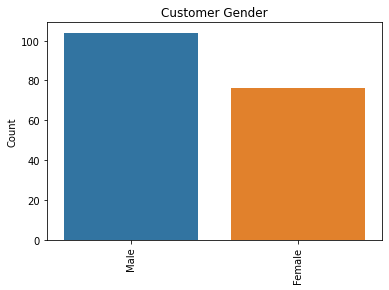

In [18]:
#plot the Customer Gender
plt.title('Customer Gender')
sns.countplot(data=df, x='Gender')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


- 104 Male customers
- 76 Female customers

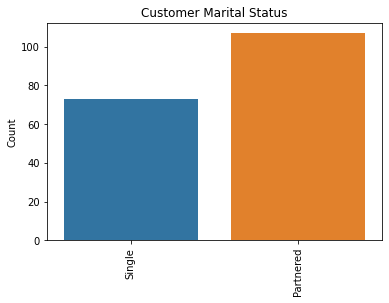

In [19]:
#plot the Customer Marital Status
plt.title('Customer Marital Status')
sns.countplot(data=df, x='MaritalStatus')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

- 73 Single customers
- 107 Partnered customers

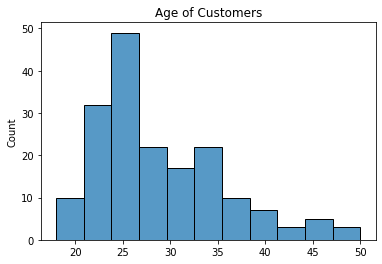

In [20]:
# Histogram plot of the Age of Customer
plt.title('Age of Customers')
sns.histplot(data=df, x='Age')
plt.xlabel('')
plt.show()

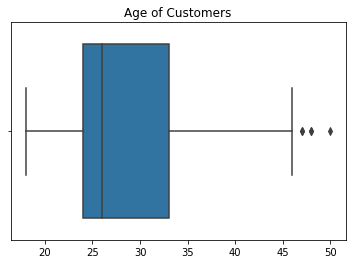

In [21]:
# Boxplot of the Age of Customer
plt.title('Age of Customers')
sns.boxplot(data=df, x='Age')
plt.xlabel('')
plt.show()

- Histogram shows the Age of the customers are right skewed
- The IQR is between ages 24 and 33 with the mean about age 26
- The outliers are 46 years old and above to buy treadmills

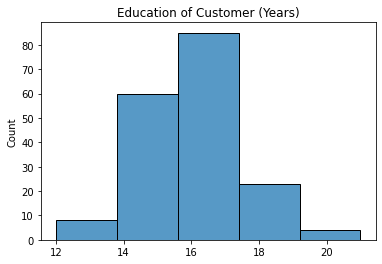

In [22]:
# Histogram plot of the Education of Customer in number of years
plt.title('Education of Customer (Years)')
sns.histplot(data=df, x='Education', bins=5)
plt.xlabel('')
plt.show()

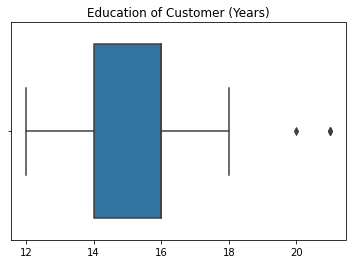

In [23]:
# Boxplot of the Education of Customer in number of years
plt.title('Education of Customer (Years)')
sns.boxplot(data=df, x='Education')
plt.xlabel('')
plt.show()

- The Histogram has a normal distribution with a mean, mode, median close to 16 years
- The IQR is between 14 to 16 years of education with outliers of 18 years of education and over

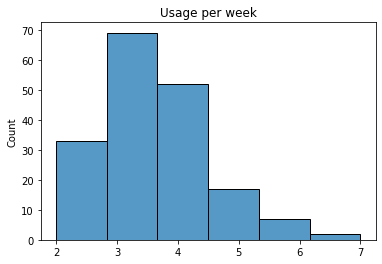

In [24]:
# Histogram plot of the number of times the customer wants to use treadmill in a week
plt.title('Usage per week')
sns.histplot(data=df, x='Usage', bins=6)
plt.xlabel('')
plt.show()

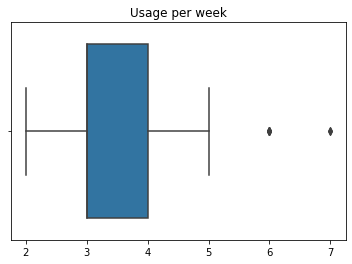

In [25]:
# Boxplot of the number of times the customer wants to use treadmill in a week
plt.title('Usage per week')
sns.boxplot(data=df, x='Usage')
plt.xlabel('')
plt.show()

- The histogram shows Usage of treadmill per week is right skewed
- The IQR is between 3 to 4 times per week, outliers are 5 times or more

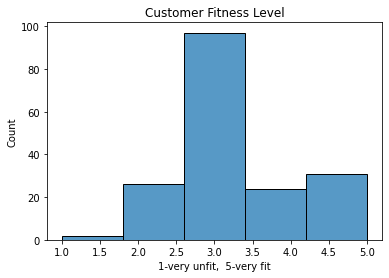

In [26]:
# Histogram plot shows the Customer Fitness Level (5=very fit, 1=very unfit)
plt.title('Customer Fitness Level')
sns.histplot(data=df, x='Fitness', bins=5)
plt.xlabel('1-very unfit,  5-very fit')
plt.show()

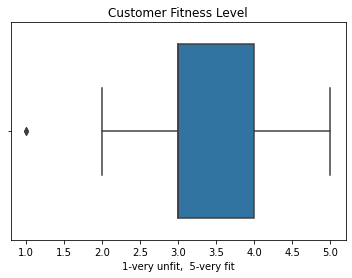

In [27]:
# Boxplot shows the Customer Fitness Level (5=very fit, 1=very unfit)
plt.title('Customer Fitness Level')
sns.boxplot(data=df, x='Fitness')
plt.xlabel('1-very unfit,  5-very fit')
plt.show()

- The hisogram shows majority of the customers rate their fitness level at 3
- The IQR is between 3 and 4 with the mean at 3, anything lower than 2 is outliers


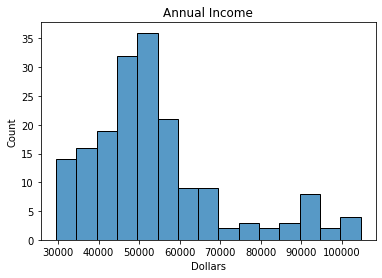

In [28]:
# Histogram plot shows the Annual Income of the customers
plt.title('Annual Income')
sns.histplot(data=df, x='Income')
plt.xlabel('Dollars')
plt.show()

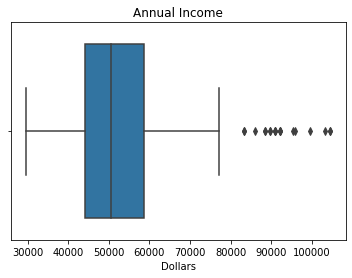

In [29]:
# Boxplot shows the Annual Income of the customers
plt.title('Annual Income')
sns.boxplot(data=df, x='Income')
plt.xlabel('Dollars')
plt.show()

- The histogram plot shows the customers Incomes are right skewed
- The IQR is approximately between 44,000 to 58,000 with the mean a little over 50,000
- The outliers are 77,000 and above

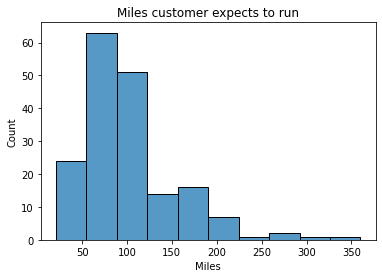

In [30]:
# Histogram plot shows the Miles the customer expects to run
plt.title('Miles customer expects to run')
sns.histplot(data=df, x='Miles', bins=10)
plt.xlabel('Miles')
plt.show()

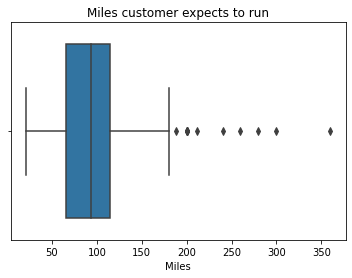

In [31]:
# Boxplot shows the Miles the customer expects to run
plt.title('Miles customer expects to run')
sns.boxplot(data=df, x='Miles')
plt.xlabel('Miles')
plt.show()

- The histogram shows that the miles customers expects to run is right skewed
- The IQR is between 65 to 120 miles with the mean around 90 miles 
- The outliers 180 and above

### Multivariate Data Analysis

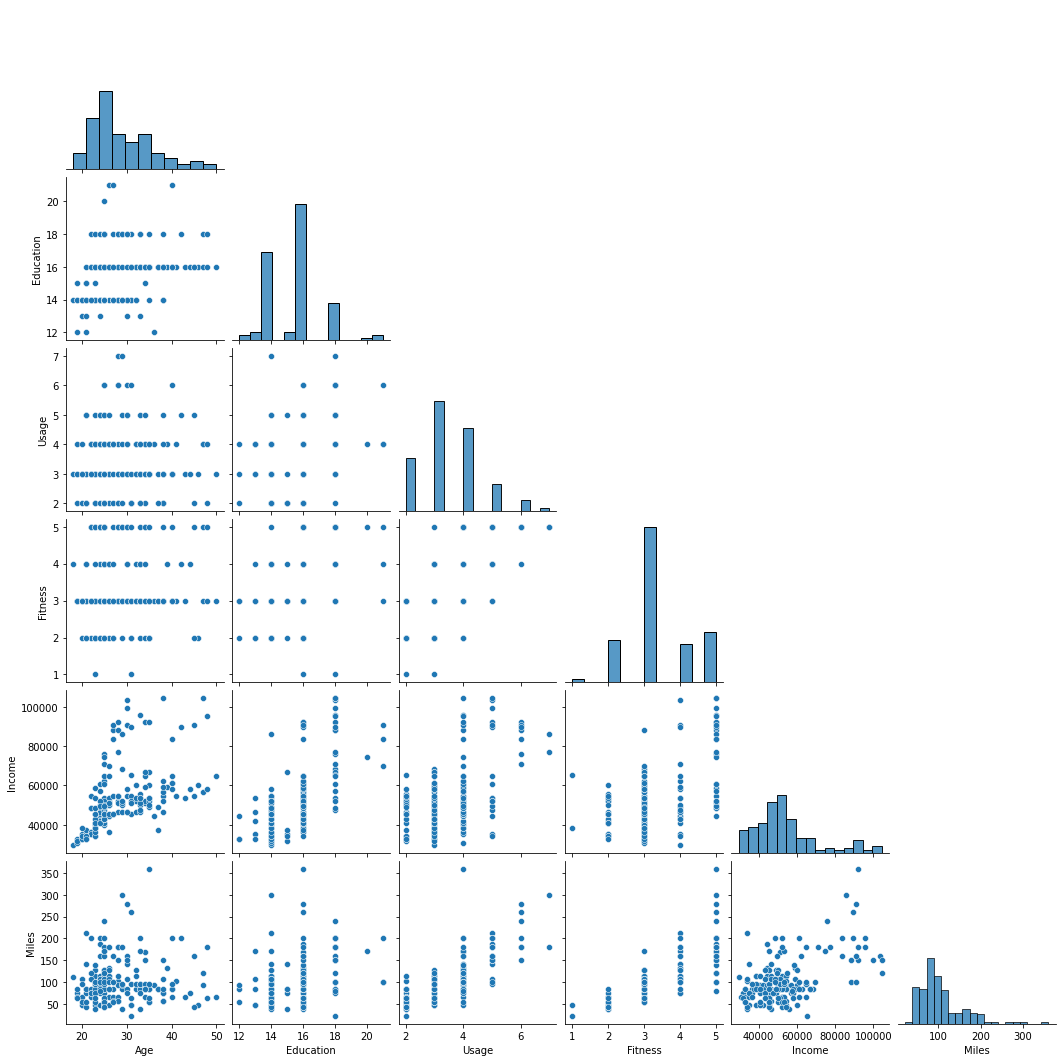

In [32]:
# Pair plot of all the numerical values, check for correlation
sns.pairplot(data=df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']], corner=True)
plt.show()

- The plot show positive correlation for the following:
1.   Usage/Miles
2.   Fitness/Miles
3.   Income/Miles
4.   Age/Income
5.   Education/Income
6.   Usage/Income
7.   Usage/Fitness
8.   Fitness/Income

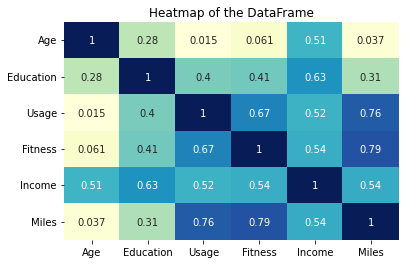

In [33]:
# Heatmap showing the correlation of the different pairs
plt.title('Heatmap of the DataFrame')
sns.heatmap(data=df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr(), annot=True, cbar=False, cmap='YlGnBu')
plt.show()

- The Heatmap shows that there is only positive correlations
- The Heatmap shows very High correlation for Fitness/Miles and Usage/Miles
- The Heatmap shows high correlation for Usage/Fitness and Education/Income
- The Heatmap shows some correlation for Age/Income, Usage/Income, Fitness/Income, Income/Miles
- The Heatmap shows a very low correlation for Age/Miles, Age/Usage and Age/Fitness
- The Heatmap shows low correlation for Age/Education and Education/Miles

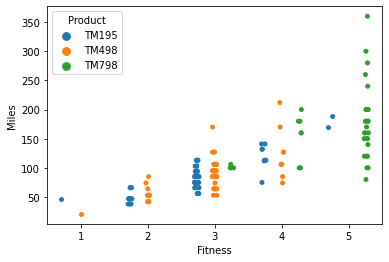

In [45]:
# Find which treadmill is used the most for Fitness/Miles positive correlation
sns.stripplot(data=df, x='Fitness', y='Miles', hue='Product',dodge=True);
plt.show()

- Customers with a high Fitness score prefer TM798 model
- Customers with a Fitness score of 3 or lower prefer TM195 and TM498 models
- Customers that run more than 200 Miles prefer TM798 model
- A really strong positive correlation between Fitness and Miles

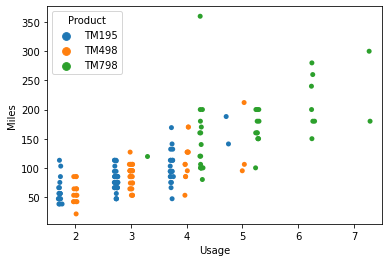

In [46]:
# Find which treadmill is used the most for Usage/Miles positive correlation
sns.stripplot(data=df, x='Usage', y='Miles', hue='Product',dodge=True);
plt.show()

- Customers that use there treadmill more than 5 times a week prefer TM798 model
- A really strong positive correlation between Usage and Miles

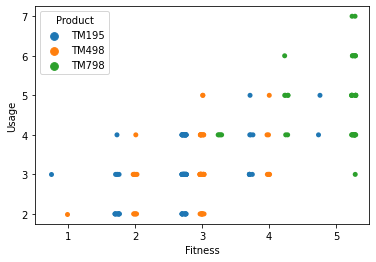

In [47]:
# Find which treadmill is used the most for Fitness/Usage positive correlation
sns.stripplot(data=df, x='Fitness', y='Usage', hue='Product',dodge=True);
plt.show()

- Customers that use treadmill a lot in a week or high Fitness score prefer TM798 model
- Strong positive correlation between Fitness level and Usage

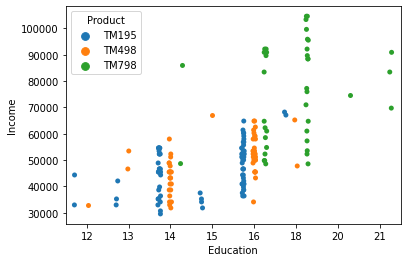

In [49]:
# Find which treadmill is used the most for Education/Income positive correlation
sns.stripplot(data=df, x='Education', y='Income', hue='Product',dodge=True);
plt.show()

- Customers with more than 16 years of education prefer the TM798 model
- Customers that earn more than 65,000 dollars a year prefer the TM798 model
- Strong positive correlation between Education and Income

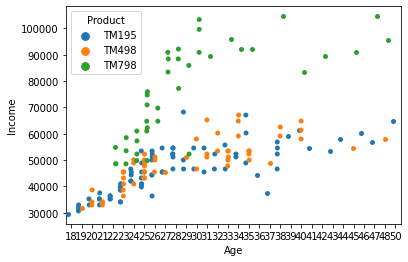

In [50]:
# Find which treadmill is used the most for Age/Income positive correlation
sns.stripplot(data=df, x='Age', y='Income', hue='Product',dodge=True);
plt.show()

- Customers that earn more than 65,000 dollars a year prefer the TM798 model
- Strong positive correlation between Age and Income

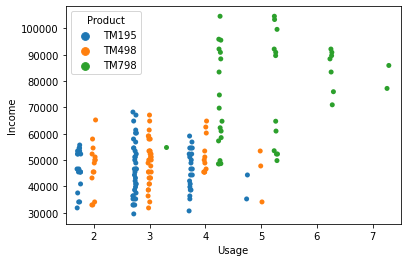

In [51]:
# Find which treadmill is used the most for Usage/Income positive correlation
sns.stripplot(data=df, x='Usage', y='Income', hue='Product',dodge=True);
plt.show()

- Customers that earn more than 65,000 dollars a year prefer the TM798 model
- Customers that use there treadmill more than 5 times a week prefer TM798 model

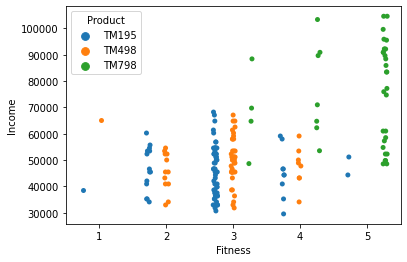

In [52]:
# Find which treadmill is used the most for Fitness/Income positive correlation
sns.stripplot(data=df, x='Fitness', y='Income', hue='Product',dodge=True);
plt.show()

- Customers with a high Fitness score prefer TM798 model
- Customers that earn more than 65,000 dollars a year prefer the TM798 model

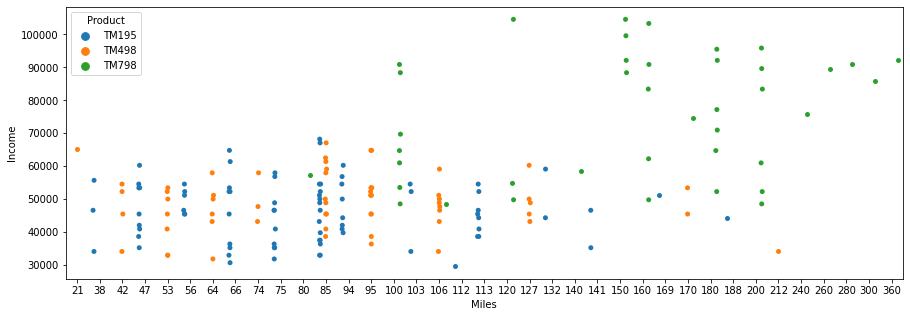

In [57]:
# Find which treadmill is used the most for Income/Miles positive correlation
plt.figure(figsize=(15,5))
sns.stripplot(data=df, x='Miles', y='Income', hue='Product',dodge=True);
plt.show()

- Customers that earn more than 65,000 dollars a year prefer the TM798 model
- Customers that earn more would like to run more Miles
- Customers that run more miles prefer the TM798 model

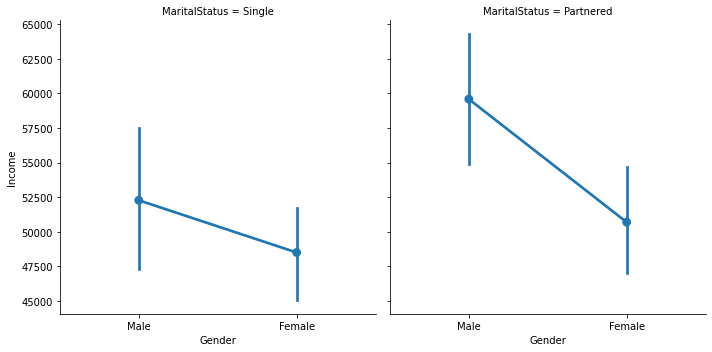

In [65]:
# Income level based on Gender and Marital Status
sns.catplot(data=df, x='Gender', col='MaritalStatus', y='Income', kind='point');
plt.show()

- Male customers earn more Income than Females
- Partnered customers earn more Income than Singles

## Summary and Conclusion:

- 60.5% of the Cardio Good Fitness Female customers are partnered
- 39.5% of the Cardio Good Fitness Female customers are single
- 58.7% of the Cardio Good Fitness Male customers are partnered
- 41.3% of the Cardio Good Fitness Male customers are 
- The majority of their customers are Partnered (Both Males and Females)
- Cardio Good Fitness sells three Treadmills
- TM195 has 80 units sold
- TM498 has 60 units sold
- TM798 has 40 units sold
- Cardio Good Fitness has 104 Male customers and 76 Female customers total
- Cardio Good Fitness has 107 Partnered customers and 73 Single customers total
- TM498 is the most popular item for Single Females
- TM195 is the most popular item for Partnered Females
- TM195 is the most popular item for Single Males
- There is little differance in popularity for all three treadmills sold for Partnered Males
- There is little differance in popularity for TM195 and TM498 treadmills sold for Single Females
- Age 24 to 33 is the target customers for Cardio Good Fitness
- Customers majority fitness level is 3
- Income, Miles, Usage, and Age distribution is right skewed
- Education of customers follow normal distribution
- The Heatmap shows a very low correlation for Age/Miles, Age/Usage and Age/Fitness
- The Heatmap shows low correlation for Age/Education and Education/Miles
- Customers with a high Fitness score prefer TM798 model
- Customers with a Fitness score of 3 or lower prefer TM195 and TM498 models
- Customers that run more than 200 Miles prefer TM798 model
- A really strong positive correlation between Fitness and Miles
- Customers that use there treadmill more than 5 times a week prefer TM798 model
- A really strong positive correlation between Usage and Miles
- Strong positive correlation between Fitness level and Usage
- Customers with more than 16 years of education prefer the TM798 model
- Customers that earn more than 65,000 dollars a year prefer the TM798 model
- Strong positive correlation between Education and Income
- Strong positive correlation between Age and Income
- Customers that earn more would like to run more Miles
- Male customers earn more Income than Females
- Partnered customers earn more Income than Singles

## Recommendations:

- Cardio Good Fitness should target customers between age 24 to 33 as this is the majority of their customers age group.
- The majority of their customers are Male so I would have Ads targeting this gender.
- TM195 is there most popular model with 80 units sold.  Cardio Good Fitness should always have plenty available.
- TM798 is the most popular model for customers with higher Education and Income so for this customers I would try to sell them this model.
- The same goes for customers with high Fitness levels and high expected Usage of their treadmill, TM798 is most popular in this case so I would try selling them this model.
- TM498 is the most popular item for Single Females so for this group I would try selling them is model.